# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Цель работы

Целью проекта является проведение исследовательского анализа данных архивных объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах с целью выявления параметров, влияющих на рыночную стоимость недвижимости. Это позволит разработать автоматизированную систему для отслеживания аномалий и предотвращения мошеннической деятельности.

План работы:

1.Открытие и предварительное изучение данных

Загрузка данных из файла.
Изучение общей информации о датасете.
Построение гистограммы для всех числовых столбцов.

2.Предобработка данных

Обнаружение и анализ пропущенных значений.
Заполнение или оставление пропусков с обоснованием.
Анализ и изменение типов данных, где это необходимо.
Устранение неявных дубликатов в названиях населённых пунктов.

3.Добавление новых столбцов

Расчёт цены одного квадратного метра.
Вычисление дня, месяца и года публикации объявления.
Определение типа этажа квартиры.
Перевод расстояний до центра города в километры.


4.Исследовательский анализ данных

Изучение и визуализация параметров объектов (площадь, количество комнат, высота потолков и др.).
Анализ и обработка аномальных и выбивающихся значений.
Исследование времени продажи квартир, определение среднего и медианного значения.
Оценка факторов, влияющих на цену (общая площадь, этаж, дата размещения и др.).
Определение средней цены квадратного метра в различных населённых пунктах.
Анализ зависимости стоимости квартир от расстояния до центра Санкт-Петербурга.
Общий вывод

5.Обобщение и фиксация результатов исследования.
Заключительные выводы по проекту.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                       'parks_around3000': 'parks_around_3000',
                       'ponds_around3000': 'ponds_around_3000'})

In [5]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


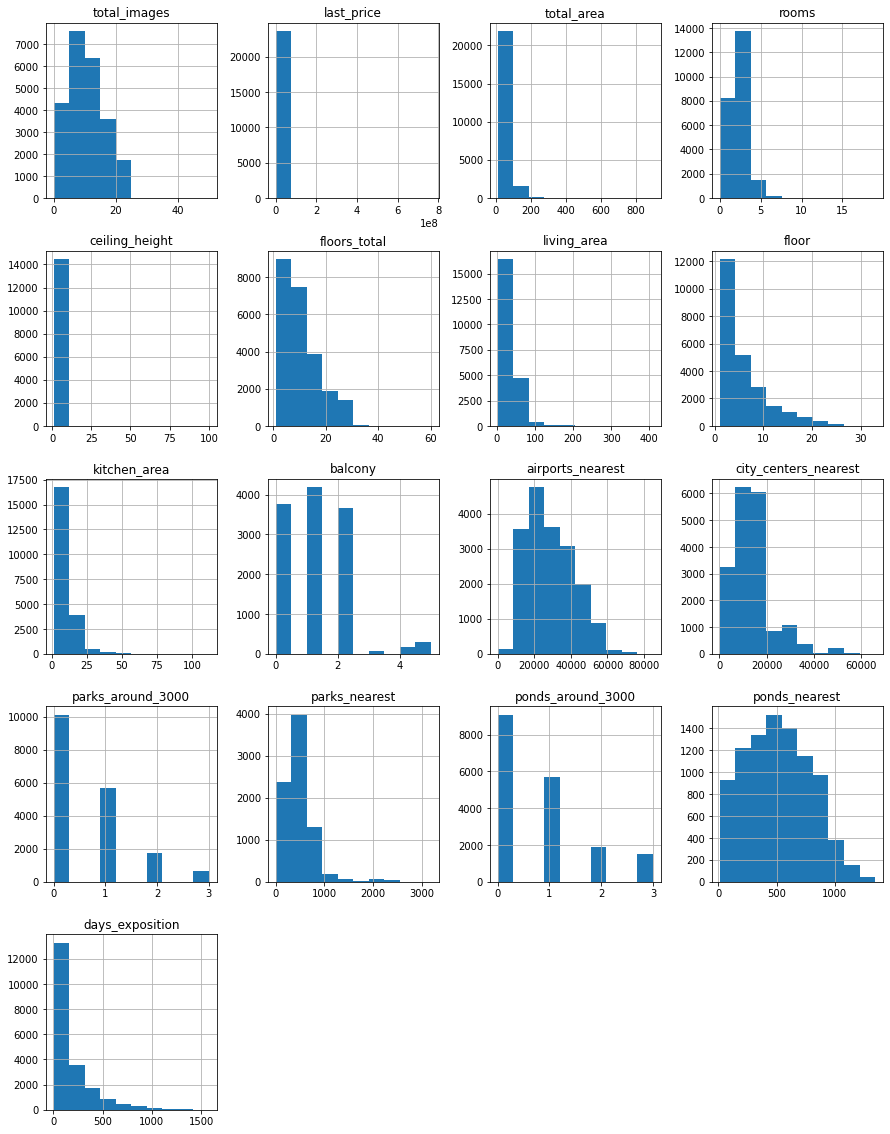

In [6]:
df.hist(figsize=(15, 20))
plt.show()

Датафрейм содержит 22 колонки и 23699 строк.

Некоторые столбцы содержат пропущенные значения. 
Некоторые столбцы могут требовать приведения к более подходящему типу данных. Например:
first_day_exposition указан как object, вероятно, это дата, которую следует преобразовать в формат даты/времени.
Столбец is_apartment, представляющий категориальные данные, также указан как object.

Судя по гистограммам, некоторые переменные имеют выраженные выбросы.

Для дальнейшего анализа потребуется обработка пропущенных значений, приведение типов данных к подходящим форматам удаление или корректировка выбросов. 

### Выполните предобработку данных

In [7]:
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [8]:
(df.isna().mean()*100).sort_values(ascending=False)

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
city_centers_nearest    23.287902
ponds_around_3000       23.283683
parks_around_3000       23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Заполню пропуски в большинстве количественных переменных медианым значением.
Медиана менее чувствительна к выбросам, чем среднее значение. Если в данных есть экстремальные значения (очень большие или очень маленькие), они могут искажать среднее значение. Медиана помогает избежать ситуации, когда небольшое количество данных и выбросы могут значительно искажать результаты. Это делает медиану предпочтительным выбором в большинстве случаев для количественных переменных.

Пропуски в столбце высота полотков заполню следующим образом:
вычислю медиану для центра Санкт-Петербурга и для его отдаленных районов. Т.к. в центре много исторической застройки и высота потолков может быть выше, чем в современных квартирах.
Для Ленинградской области заполню пропуски по медиане высоты потолков квартир Ленинградской области.

In [9]:
median_spb_center = df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'] <= 10000), 'ceiling_height'].median()
median_spb_other = df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'] >= 10000), 'ceiling_height'].median()
median_len_obl = df.loc[(df['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'].median()

df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'] <= 10000), 'ceiling_height'] = \
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'] <= 10000), 'ceiling_height'] \
.fillna(median_spb_center)

df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'] >= 10000), 'ceiling_height'] = \
df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['city_centers_nearest'] >= 10000), 'ceiling_height'] \
.fillna(median_spb_other)

df.loc[(df['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'] = \
df.loc[(df['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'] \
.fillna(median_len_obl)


In [10]:
df['ceiling_height'].isna().sum()

30

Вижу, что осталось 30 незаполненных строчек. Посмотрю, что это за строчки и есть ли возможность заполнить пропуски на основе других данных.

In [11]:
df.loc[df['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
81,9,10949000.0,68.00,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,7,37000000.0,161.00,2016-05-22T00:00:00,3,NaN,9.0,84.00,8,NaN,...,NaN,0.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,402.0
1872,13,3100000.0,32.00,2019-03-15T00:00:00,1,NaN,4.0,19.00,2,False,...,5.00,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1895,12,9500000.0,130.00,2019-03-27T00:00:00,5,NaN,5.0,90.00,2,NaN,...,15.00,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,15.0
2364,17,4300000.0,32.60,2019-04-28T00:00:00,1,NaN,25.0,14.30,17,NaN,...,8.10,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,6,28099500.0,174.00,2018-12-19T00:00:00,3,NaN,10.0,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3200,9,10912400.0,68.00,2018-12-19T00:00:00,1,NaN,10.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3831,5,4850000.0,37.40,2019-03-02T00:00:00,1,NaN,NaN,NaN,7,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4323,5,25476800.0,160.00,2018-12-19T00:00:00,2,NaN,10.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5908,7,11170500.0,68.00,2018-12-19T00:00:00,1,NaN,10.0,NaN,9,NaN,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Изучив срез, вижу, что многие данные пропущенны. Поэтому принимаю решение удалить эти пропуски. На результаты исследования они не повлияют.

In [12]:
df = df.dropna(subset=['ceiling_height'])

In [13]:
df['ceiling_height'].isna().sum()

0

In [14]:
df['floors_total'].median()

9.0

In [15]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.6,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.6,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,3.0,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.6,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.6,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.6,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,3.0,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,3.0,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропуски в столбце все этажей в доме оставлю пустым, т.к. заполнение по медиане приведет к ошибке. (Медиана равна 9 этажам, а есть проспуски так, где квартира находится на 20, 12, 18 этажах)

Пропуски в жилой площади заполню в зависимоти от количества комнат.

In [16]:
for d in df['rooms'].unique():
    df.loc[(df['rooms'] == d) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == d), 'living_area'].median()

In [17]:
df['living_area'].isna().sum()

0

Пропуски в столбце апартаменты заполню False. Т.к. считаю, что пользователи пропускали данные пункт, чье жилье не является апартаментами.

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)

In [19]:
df['is_apartment'].value_counts()

False    23619
True        50
Name: is_apartment, dtype: int64

In [20]:
df['is_apartment'].isna().sum()

0

Пропуски в столбце размер кухни заполню на основании количества комнат, за исключенем квартир студий. Там пропуски осталю, т.к. кухни там нет.

In [21]:
for d in df[df['rooms'] != 0]['rooms'].unique():
    df.loc[(df['rooms'] == d) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == d), 'kitchen_area'].median()
    

In [22]:
(df['kitchen_area'].sum()+df['living_area'].sum()) < df['total_area'].sum()

True

In [23]:
df['kitchen_area'].isna().sum()

197

In [24]:
df['kitchen_area'] = df['kitchen_area'].fillna(0)

В квартирах-студиях заполню пропуски в площади кухни на 0. 

Пропуски в столбце балконы заполню на 0. Пользователи, у кого нет балконов, не заполнили этот пункт.

In [25]:
df['balcony'] = df['balcony'].fillna(0)

In [26]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Пропуски в названиях населенных пунктов заполню на unknown.

Пропуски в столбцах

airports_nearest         
city_centers_nearest     
parks_around_3000
parks_nearest           
ponds_around_3000        
ponds_nearest
days_exposition

оставлю, т.к. эти столбцы заполнялись автоматически на основании геоданных. Возможно произошел сбой при передачи данных. Заполнение этих данных может привести к искажению исследования.





Поменял формат в столбце first_day_exposition на to_datetime.

In [27]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
df['last_price'].astype(int)

0        13000000
1         3350000
2         5196000
3        64900000
4        10000000
           ...   
23694     9700000
23695     3100000
23696     2500000
23697    11475000
23698     1350000
Name: last_price, Length: 23669, dtype: int64

Меняю формат для столбца first_day_exposition на формат datetime, для возможности в дальнейшем легче воспринимать информацию из данного столбца и работы с ним.

Так же поменял формат в столбце last_price так же для возможности лучше воспринимать информацию.

In [29]:
def process_locality_name(name):
    name = name.replace('ё', 'е')
    name = name.lower()
    words_to_remove = [
        'коттеджный ', 'станции ', 'садовое товарищество ', 'село ', 
        'городской поселок ', 'деревня ', 'поселок ', 'городского типа ', 
        'при железнодорожной ', 'имени ', 'садоводческое некоммерческое товарищество '
    ]
        
    for word in words_to_remove:
        name = name.replace(word, '')
    return name.strip()

df['locality_name'] = df['locality_name'].apply(process_locality_name)

In [30]:
#df['locality_name'] = df['locality_name'].str.replace('ё', 'е') \
#                   .str.lower() \
#                   .replace(['коттеджный ', 'станции ', 'садовое товарищество ', 
#      'село ', 'городской поселок ', 'деревня ', 'поселок ', 'городского типа ', 'при железнодорожной ',
#     'имени ', 'садоводческое некоммерческое товарищество '], '', regex=True)                 

In [31]:
sorted(df['locality_name'].unique())

['unknown',
 'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'большая вруда',
 'большая ижора',
 'большая пустомержа',
 'большие колпаны',
 'большое рейзино',
 'большой сабск',
 'бор',
 'борисова грива',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'вахнова кара',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'гостилицы',
 'громово',
 'дзержинского',
 'дружная горка',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'извара',
 'ильичево',
 'иссад',


### Добавьте в таблицу новые столбцы

In [32]:
df['price_one_square'] = df['last_price']/df['total_area']
df['price_one_square'] = df['price_one_square'].round(2)

In [33]:
df['day_publication'] = df['first_day_exposition'].dt.weekday
df['day_publication']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: day_publication, Length: 23669, dtype: int64

In [34]:
df['month_publication'] = df['first_day_exposition'].dt.month
df['month_publication']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_publication, Length: 23669, dtype: int64

In [35]:
df['year_publication'] = df['first_day_exposition'].dt.year
df['year_publication']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_publication, Length: 23669, dtype: int64

In [36]:
def type(row):
    floor  =  row['floor']
    
    if floor == 1:
        return 'первый'
    elif floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'




df['type_floor'] = df.apply(type, axis=1)

In [37]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square,day_publication,month_publication,year_publication,type_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


In [38]:
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000

In [39]:
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].round() 
df['city_centers_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_centers_nearest_km, dtype: float64

### Проведите исследовательский анализ данных

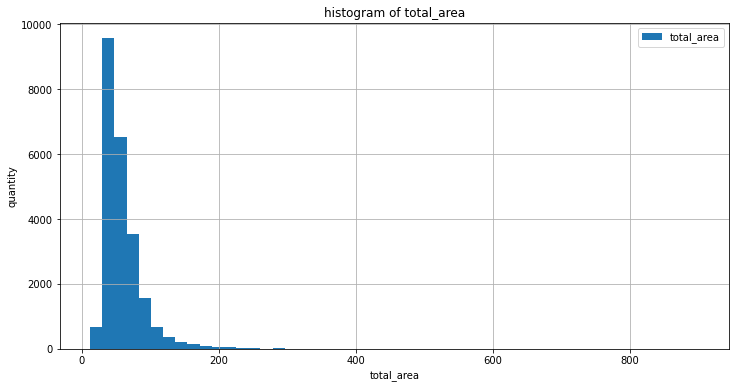

In [40]:
df['total_area'].hist(bins=50, figsize=(12,6), legend=True)
plt.xlabel('total_area') 
plt.ylabel('quantity')  
plt.title('histogram of total_area')  
plt.show()

Основная масса значений находится в диапазоне от 0 до 100. Воспользуюсь диаграммой размаха для определения границы выбросов.

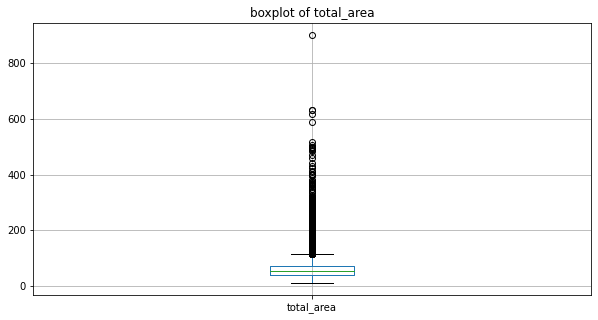

In [41]:
df.boxplot('total_area', figsize=(10,5))   
plt.title('boxplot of total_area')
plt.show()

In [42]:
percentage_of_deleted_data_total_area = (df['total_area'] < 20) | (df['total_area'] > 112)
percentage_of_deleted_data_total_area.mean()*100

5.669863534581097

In [43]:
df = df.query('(total_area > 20) & (total_area <= 112)')

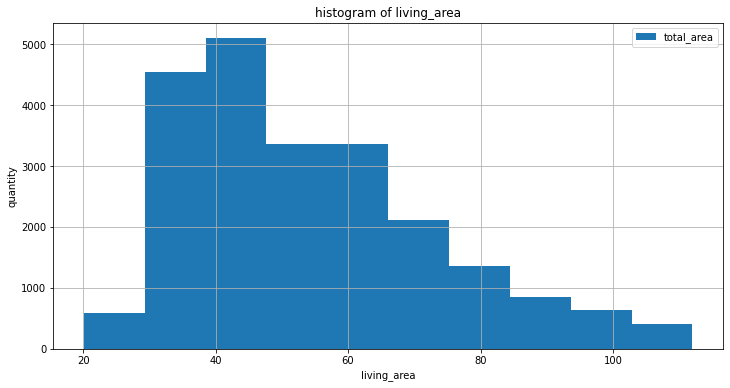

In [44]:
df['total_area'].hist(figsize=(12,6), legend=True)
plt.xlabel('living_area') 
plt.ylabel('quantity')  
plt.title('histogram of living_area')  
plt.show()

Исключил  значения до 20 и после 112. До 20 т.к. таких квартиры либо встречаются крайне редко, либо это ошибка и пользователь продавал комнату, а не квартиру.Все квартиры с общей площадью выше, чем 112 кв. метров, так же являются редкими значениями и выбросами.

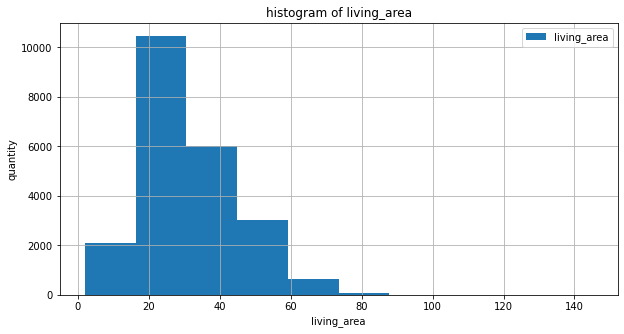

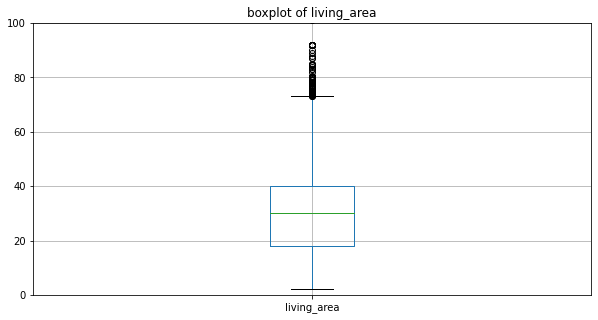

count    22319.000000
mean        30.919947
std         13.299351
min          2.000000
25%         18.000000
50%         30.000000
75%         40.000000
max        145.000000
Name: living_area, dtype: float64

In [45]:
df['living_area'].hist(figsize=(10,5), legend=True)
plt.xlabel('living_area') 
plt.ylabel('quantity')  
plt.title('histogram of living_area') 
plt.show()
df.boxplot('living_area', figsize=(10,5))
plt.ylim(0, 100)
plt.title('boxplot of living_area')
plt.show()
df['living_area'].describe()

In [46]:
percentage_of_deleted_data_living_area = (df['living_area'] < 10) | (df['living_area'] >= 80)
percentage_of_deleted_data_living_area.mean()*100

0.2688292486222501

In [47]:
df = df.query('(living_area > 10) & (living_area <= 80)')

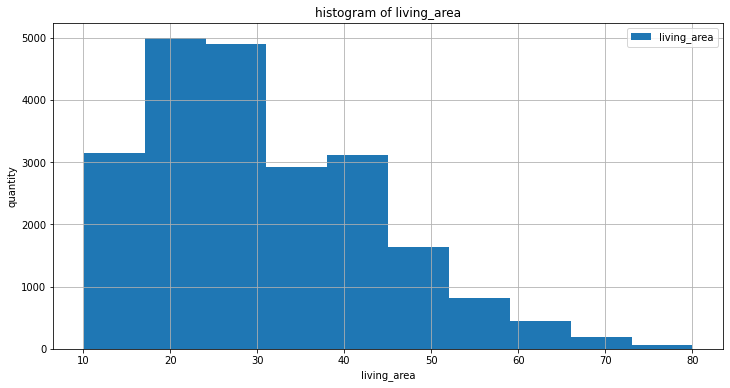

In [48]:
df['living_area'].hist(figsize=(12,6), legend=True)
plt.xlabel('living_area') 
plt.ylabel('quantity')  
plt.title('histogram of living_area') 
plt.show()

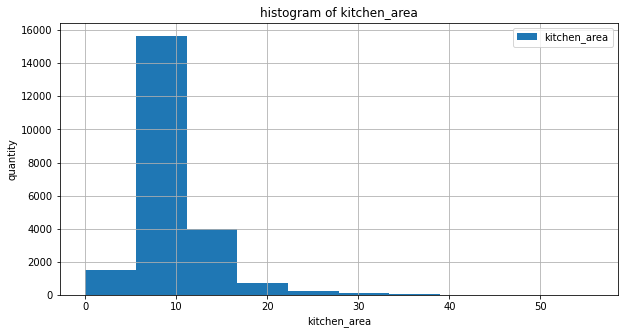

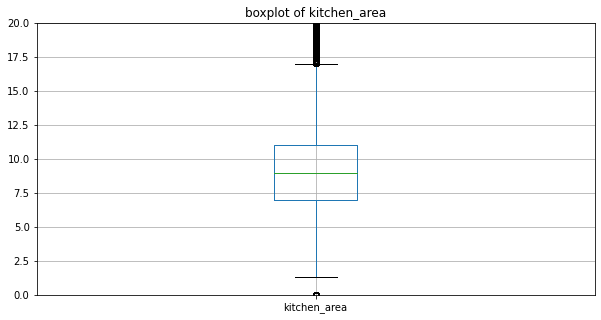

count    22240.000000
mean         9.721201
std          4.177113
min          0.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         55.700000
Name: kitchen_area, dtype: float64

In [49]:
df['kitchen_area'].hist(figsize=(10,5), legend=True)
plt.xlabel('kitchen_area') 
plt.ylabel('quantity')  
plt.title('histogram of kitchen_area')
plt.show()
df.boxplot('kitchen_area', figsize=(10,5))
plt.ylim(0, 20)
plt.title('boxplot of kitchen_area')
plt.show()
df['kitchen_area'].describe()

In [50]:
percentage_of_deleted_data_kitchen_area = df['kitchen_area'] > 17.5
percentage_of_deleted_data_kitchen_area.mean()*100

4.069244604316546

In [51]:
df = df.query('kitchen_area <= 17.5')

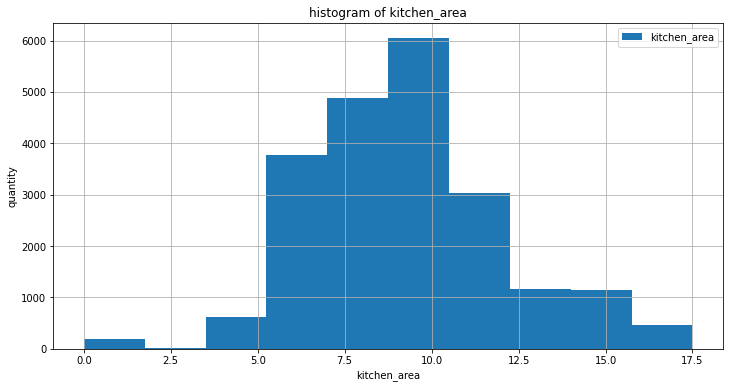

In [52]:
df['kitchen_area'].hist(figsize=(12,6), legend=True)
plt.xlabel('kitchen_area') 
plt.ylabel('quantity')  
plt.title('histogram of kitchen_area')
plt.show()

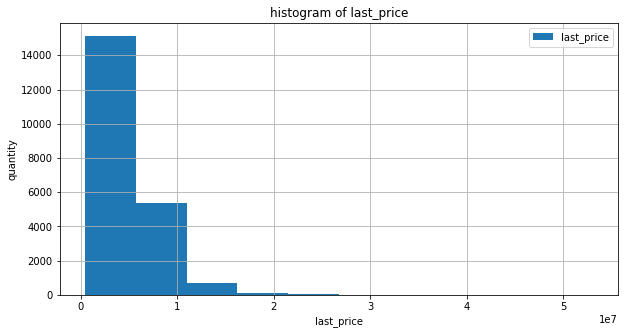

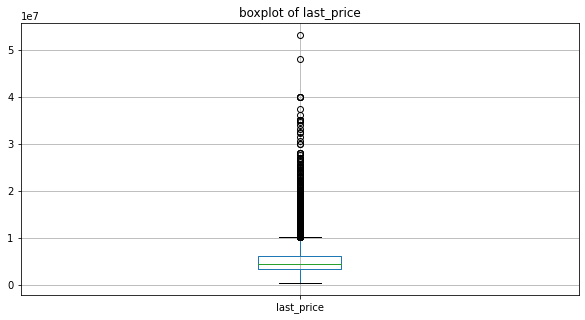

count    2.133500e+04
mean     5.052409e+06
std      2.937896e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      5.300000e+07
Name: last_price, dtype: float64

In [53]:
df['last_price'].hist(figsize=(10,5), legend=True)
plt.xlabel('last_price') 
plt.ylabel('quantity')  
plt.title('histogram of last_price')
plt.show()
df.boxplot('last_price', figsize=(10,5))
plt.title('boxplot of last_price')
plt.show()
df['last_price'].describe()

На гистограмме видно, что количетсво квартир дороже 15 млн., очень близко к нулю. В исследовании оставлю квартиры до 15 млн. руб.

In [54]:
percentage_of_deleted_data_last_price = df['last_price'] > 15000000
percentage_of_deleted_data_last_price.mean()*100

0.9842981017108038

In [55]:
df = df.query('last_price <= 15000000')

Text(0.5, 1.0, 'histogram of last_price')

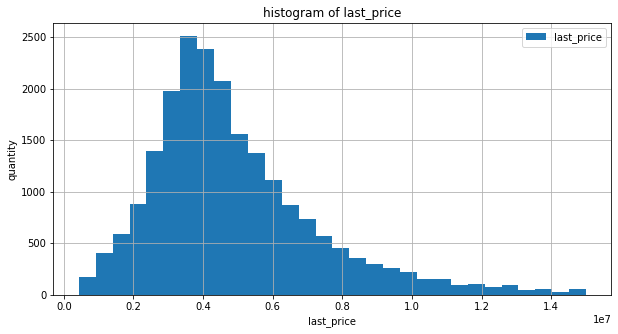

In [56]:
df['last_price'].hist(bins=30, figsize=(10,5), legend=True)
plt.xlabel('last_price') 
plt.ylabel('quantity')  
plt.title('histogram of last_price')

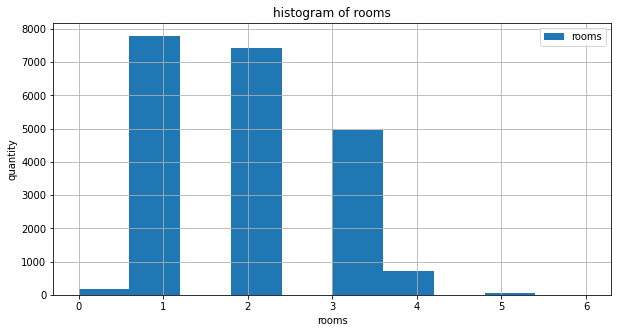

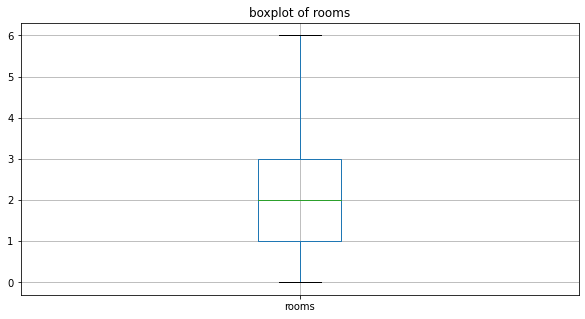

count    21125.000000
mean         1.925112
std          0.891255
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [57]:
df['rooms'].hist(figsize=(10,5), legend=True )
plt.xlabel('rooms') 
plt.ylabel('quantity')  
plt.title('histogram of rooms')
plt.show()
df.boxplot('rooms', figsize=(10,5))
plt.title('boxplot of rooms')
plt.show()
df['rooms'].describe()

Количетсво комнат оставлю без изменений, т.к. на диаграмме размаха нет выбросов.

In [58]:
df['ceiling_height'] = df['ceiling_height'].replace({20: 2.4, 22.6: 2.26, 24: 2.4, 25: 2.5, 26: 2.6, 27: 2.7, 27.5 : 2.75, 32: 3.2})
df['ceiling_height'].unique()

array([  2.6 ,   2.5 ,   2.67,   2.56,   3.05,   2.7 ,   3.  ,   2.75,
         2.9 ,   2.8 ,   2.55,   2.65,   2.61,   3.2 ,   3.25,   3.45,
         2.77,   2.64,   2.57,   4.15,   4.  ,   2.47,   2.73,   2.84,
         3.1 ,   2.34,   3.4 ,   2.72,   2.54,   2.51,   2.78,   2.76,
         2.58,   2.52,   3.5 ,   2.66,   2.59,   2.  ,   2.85,   3.3 ,
         2.45,   2.92,   3.13,   3.15,   3.55,   3.62,   3.12,   2.53,
         2.46,   3.8 ,   5.  ,   2.79,   2.95,   4.06,   2.94,   3.7 ,
         3.54,   2.83,   2.4 ,   3.38,   3.01,   2.74,   3.65,   2.71,
         2.3 ,   2.48,   2.62,   3.57,   2.82,   3.98,   2.63,   3.83,
         2.88,   4.19,   3.35,   4.8 ,   4.5 ,   4.2 ,   3.75,   3.07,
         3.37,   3.09,   8.  ,   3.16,   3.6 ,   3.34,   2.81,   3.44,
         4.37,   3.9 ,   4.1 ,   3.95,   2.68,   3.46,   3.27,   3.47,
         3.33,   3.63,   3.14,   3.32,   1.2 ,   3.18,   8.3 ,   2.93,
         3.24,   3.36,   2.86,   3.08,   3.17,   3.11,   3.67,   3.28,
      

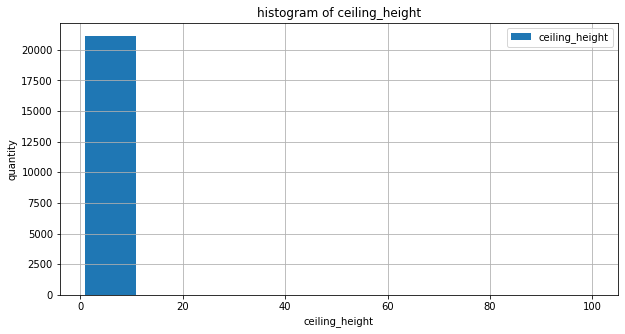

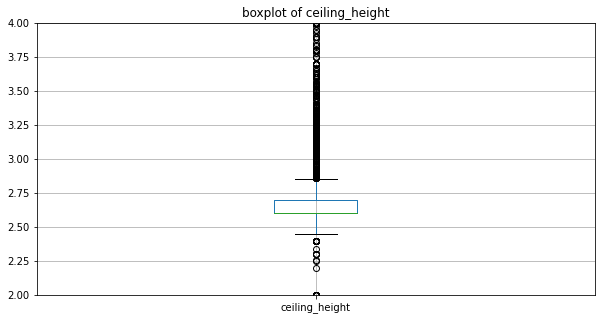

count    21125.000000
mean         2.681532
std          0.709636
min          1.000000
25%          2.600000
50%          2.600000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [59]:
df['ceiling_height'].hist(figsize=(10,5), legend=True )
plt.xlabel('ceiling_height') 
plt.ylabel('quantity')  
plt.title('histogram of ceiling_height')
plt.show()
df.boxplot('ceiling_height', figsize=(10,5))
plt.ylim(2, 4)
plt.title('boxplot of ceiling_height')
plt.show()
df['ceiling_height'].describe()

Высота потолка не может быть 1 метр, стандартная высота полотка от 2,5 метров. Значения больше 3,5 метров близятся к нулю.

In [60]:
percentage_of_deleted_data_ceiling_height = (df['ceiling_height'] < 2.5) | (df['ceiling_height'] > 3.5)
percentage_of_deleted_data_ceiling_height.mean()*100

0.9704142011834319

In [61]:
df = df.query('(ceiling_height >= 2.5) & (ceiling_height <= 3.5)')

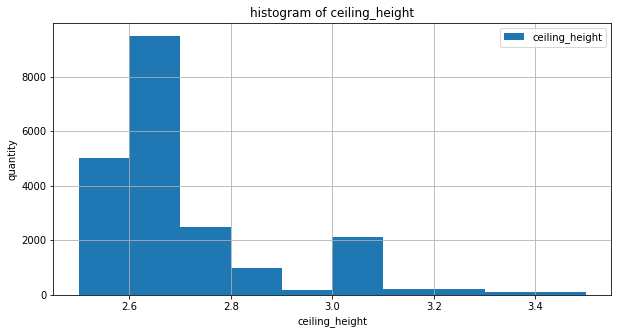

In [62]:
df['ceiling_height'].hist(figsize=(10,5), legend=True )
plt.xlabel('ceiling_height') 
plt.ylabel('quantity')  
plt.title('histogram of ceiling_height')
plt.show()

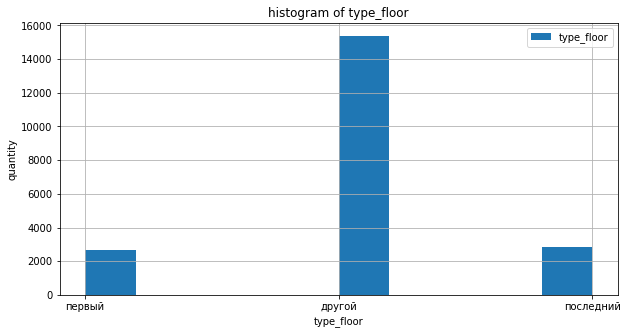

In [63]:
df['type_floor'].hist(figsize=(10,5), legend=True )
plt.xlabel('type_floor') 
plt.ylabel('quantity')  
plt.title('histogram of type_floor')
plt.show()

Первые и последние этажы продаются в 8 раз меньше, чем квартиры на остальных этажах.

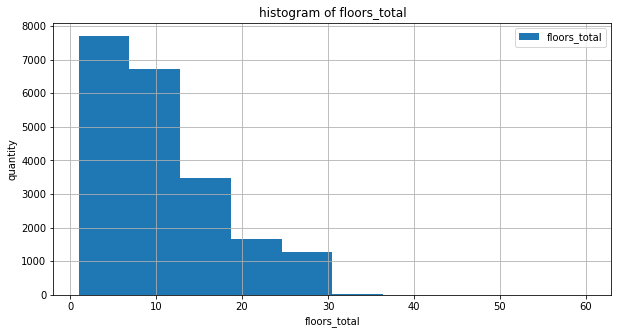

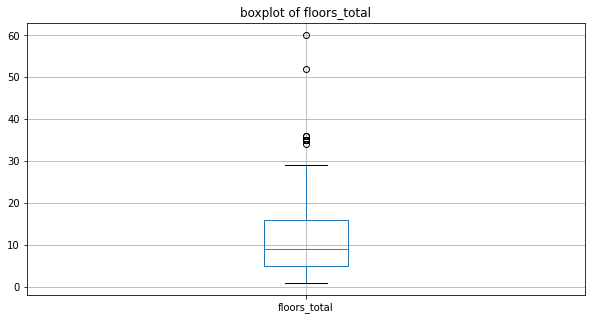

count    20847.000000
mean        10.790665
std          6.603955
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [64]:
df['floors_total'].hist(figsize=(10,5), legend=True )
plt.xlabel('floors_total') 
plt.ylabel('quantity')  
plt.title('histogram of floors_total')
plt.show()
df.boxplot('floors_total', figsize=(10,5))
plt.title('boxplot of floors_total')
plt.show()
df['floors_total'].describe()

In [65]:
percentage_of_deleted_data_floors_total = df['floors_total'] > 30
percentage_of_deleted_data_floors_total.mean()*100

0.09560229445506692

In [66]:
df = df.query('floors_total <= 30')

Дома с этажностью выше 30 этажей встречаются крайне редко. Считаю, что их можно убрать из исследования.

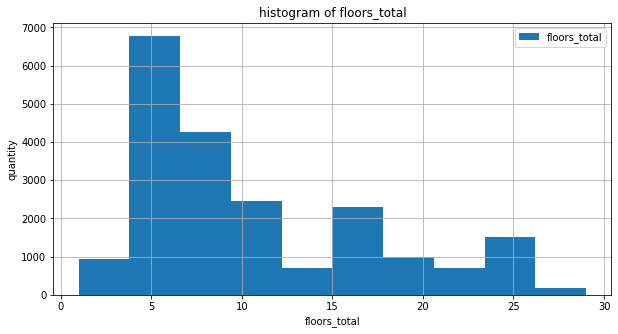

In [67]:
df['floors_total'].hist(figsize=(10,5), legend=True )
plt.xlabel('floors_total') 
plt.ylabel('quantity')  
plt.title('histogram of floors_total')
plt.show()

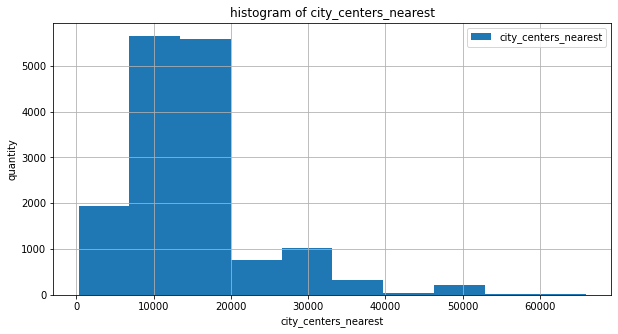

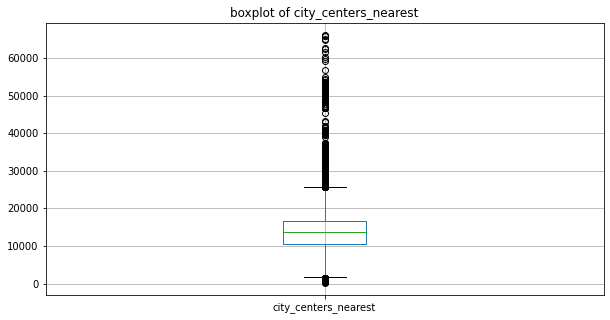

count    15579.000000
mean     14983.005970
std       8458.618874
min        287.000000
25%      10659.000000
50%      13615.000000
75%      16685.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [68]:
df['city_centers_nearest'].hist(figsize=(10,5), legend=True )
plt.xlabel('city_centers_nearest') 
plt.ylabel('quantity')  
plt.title('histogram of city_centers_nearest')
plt.show()
df.boxplot('city_centers_nearest', figsize=(10,5))
plt.title('boxplot of city_centers_nearest')
plt.show()
df['city_centers_nearest'].describe()

Расстояние до центра оставлю без изменений.

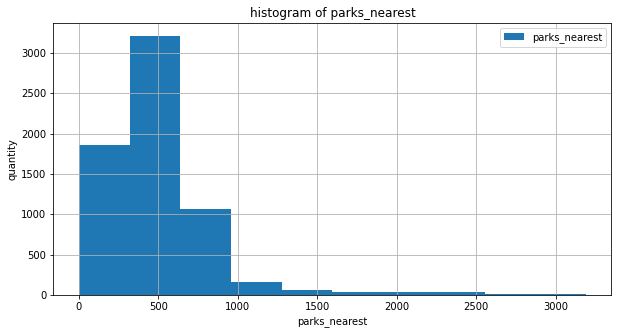

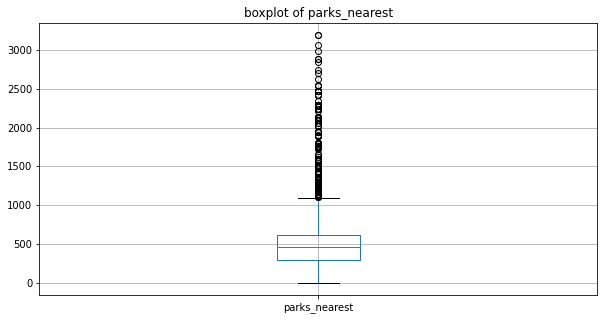

count    6464.000000
mean      490.658571
std       329.446709
min         1.000000
25%       293.000000
50%       456.000000
75%       615.250000
max      3190.000000
Name: parks_nearest, dtype: float64

In [69]:
df['parks_nearest'].hist(figsize=(10,5), legend=True )
plt.xlabel('parks_nearest') 
plt.ylabel('quantity')  
plt.title('histogram of parks_nearest')
plt.show()
df.boxplot('parks_nearest', figsize=(10,5))
plt.title('boxplot of parks_nearest')
plt.show()
df['parks_nearest'].describe()

Основная доля парков находится на расстоянии от 450 до 550 метров. Оставлю расстояние до парков без изменений.

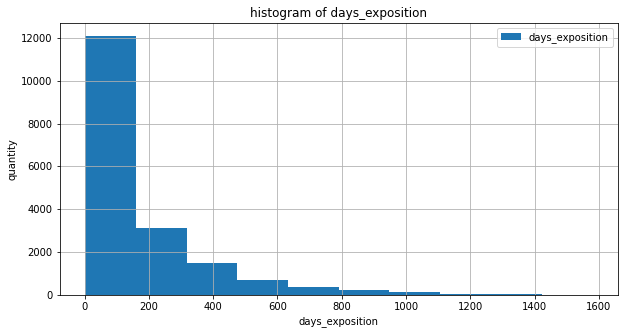

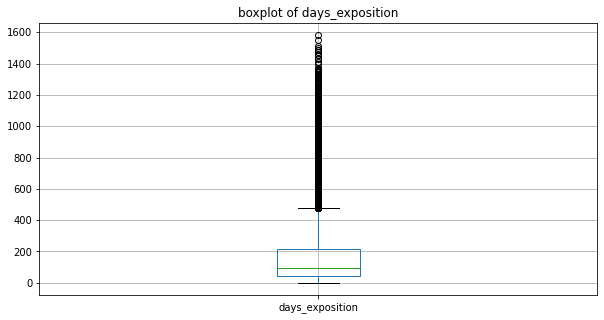

In [70]:
df['days_exposition'].hist(figsize=(10,5), legend=True )
plt.xlabel('days_exposition') 
plt.ylabel('quantity')  
plt.title('histogram of days_exposition')
plt.show()
df.boxplot('days_exposition', figsize=(10,5)) 
plt.title('boxplot of days_exposition')
plt.show()

In [71]:
df['days_exposition'].describe()

count    18277.000000
mean       172.199978
std        210.295148
min          1.000000
25%         44.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

Продажа обчно занимает от 1 до 218 дней. Быстрой продажей считаю, все что меньше медианы, т.е. продавалось быстрее чем за 91 день. Необычно долгой считаю продажи, которые выходят за рамки усов диаграммы размаха, все что более 500 дней.

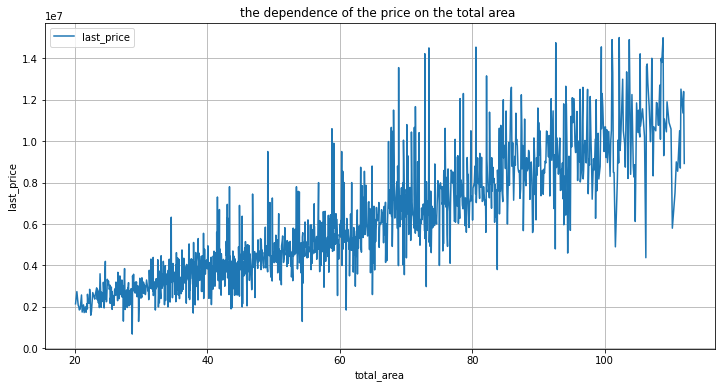

0.7072542777490071

In [72]:
df.pivot_table(index='total_area', values='last_price') \
    .plot(grid=True, figsize=(12, 6), legend=True )
plt.xlabel('total_area') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the total area ')
plt.show()
df['last_price'].corr(df['total_area'])

График подтверждает, что общая площадь является одним из основных факторов, влияющих на цену квартир. Однако, значительное разнообразие цен при одинаковых площадях указывает на то, что для точного прогноза стоимости необходимо учитывать и другие параметры. Корреляция показывает высокую положительную зависимость. Это говорит о том, что по мере увеличения жилой площади (living_area) часто происходит увеличение цены (last_price), хотя это не абсолютное правило.

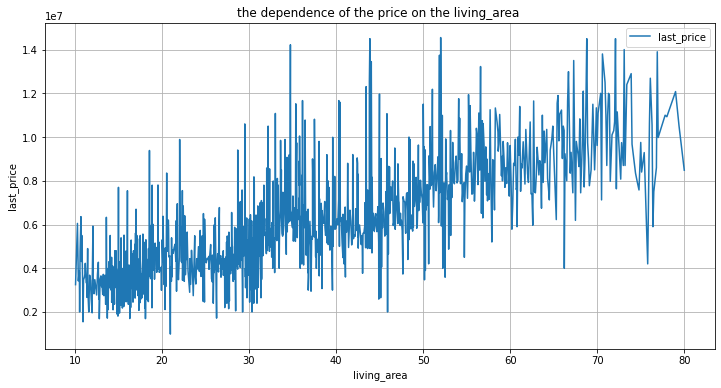

0.5716599401808945

In [73]:
df.pivot_table(index='living_area', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('living_area') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the living_area ')
plt.show()
df['last_price'].corr(df['living_area'])

Как и в случае с общей площадью, наблюдается положительная корреляция между жилой площадью и ценой. Это означает, что квартиры с большей жилой площадью, как правило, имеют более высокую стоимость. Каждой категории имеются значительные колебания цен. Например, в для квартир с жилой площадью 35 квадратных метров стоимость составляет от 4 до 14 млн. Это говорит о том, что на стоимость квартиры так же влияют дополнительные фактора. Такие как местоположение, этаж, наличие инфроструктыры и т.д.
Корреляция 0.57 указывает на умеренную положительную связь. Хотя и есть положительная связь, есть и другие факторы, которые могут значительно повлияет на соотношения цены и жилой площади.

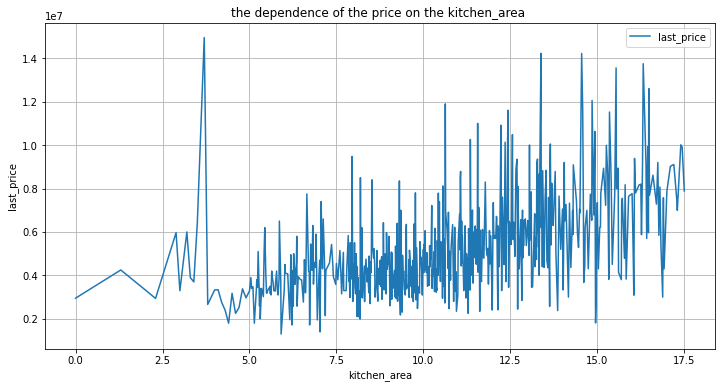

0.47148709129146643

In [74]:
df.pivot_table(index='kitchen_area', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('kitchen_area') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the kitchen_area ')
plt.show()
df['last_price'].corr(df['kitchen_area'])

Хотя площадь кухни оказывает влияние на стоимость квартиры, этот фактор не является основным. График демонстрирует, что цены на квартиры с одинаковой площадью кухни могут значительно различаться.
Корреляция 0.47 говорит о том, что есть некоторая положительная линейная зависимость, но она незначительная и не позволяет делать точные предсказания только на основе этих данных

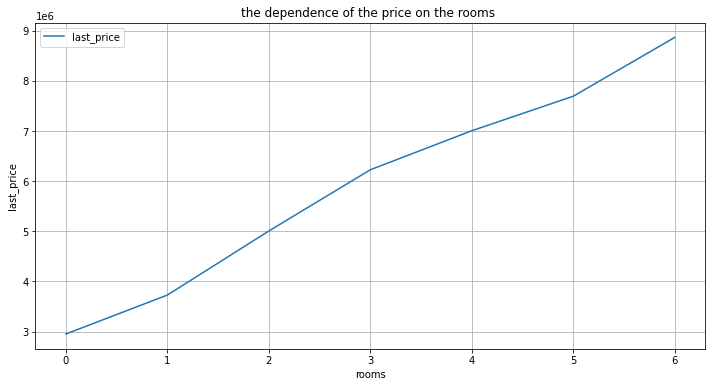

0.44087461334011796

In [75]:
df.pivot_table(index='rooms', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('rooms') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the rooms ')
plt.show()
df['last_price'].corr(df['rooms'])

Количество комнат является значимым фактором, определяющим цену квартиры. График ясно показывает, что чем больше комнат в квартире, тем выше её стоимость.
Несмотря на визуально заметный тренд роста цены от количества комнат значение корреляции 0.44 указывает на слабую положительную связь между этими параметрами. Это может быть связано со следующими факторами:
нелинейная засисимость и другие влияющие факторы (местоположение, размер общей и жилой площадей и т.д.)

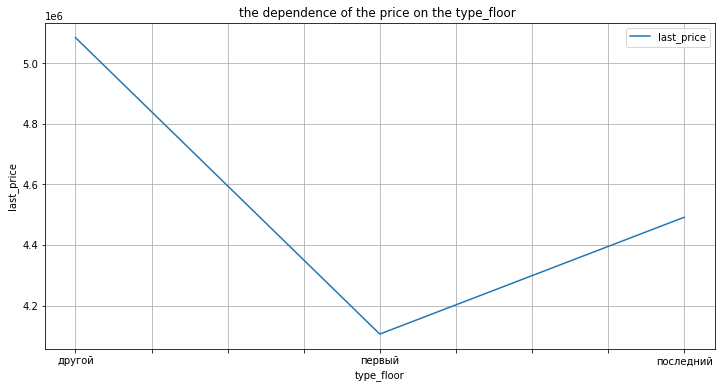

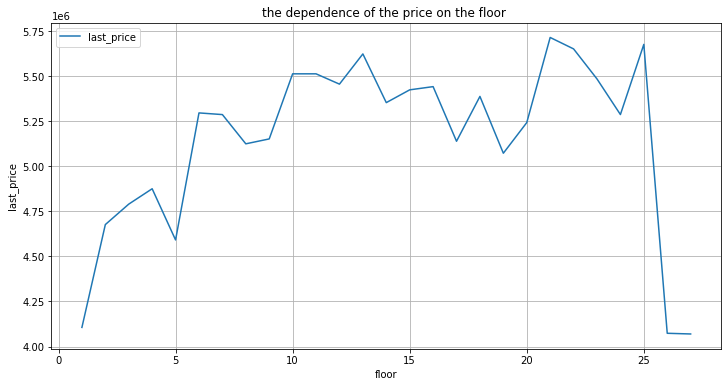

0.13486710232697444

In [76]:
df.pivot_table(index='type_floor', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('type_floor') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the type_floor ')
plt.show()
df['last_price'].corr(df['floor'])
df.pivot_table(index='floor', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('floor') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the floor ')
plt.show()
df['last_price'].corr(df['floor'])

Данные графики показывают, что на стоимость квартиры влияет этаж на котором находится квартиры. Самые дешевые квартиры расположены на первом этаже, немного дороже квартиры на последнем этаже. Низкая стоимость таких квартир обосновывается с рисками коммунального характера ( затопление, ходоные полы, может недойти напор воды, протекча кровли).

При расчете корреляции используется числовое значение этажа, что не учитывает категоризацию.
Корреляция 0.13 указывает на слабую линейную зависимость между этажем и ценой. Это говорит о том, что, несмотря на визуальные тренды, номер этажа сам по себе не является сильным фактором влияния на цену квартиры.

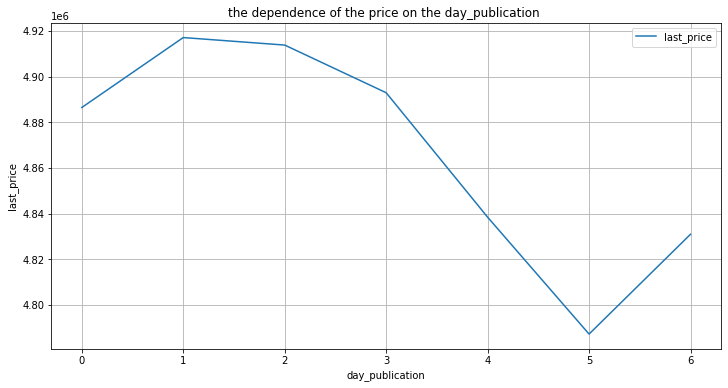

-0.013022655783924388

In [77]:
df.pivot_table(index='day_publication', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('day_publication') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the day_publication ')
plt.show()
df['last_price'].corr(df['day_publication'])

Наибольшие цены наблюдаются в начале недели, в то время как к пятнице цены снижаются, возможно, из-за уменьшения спроса. Данная информация может быть полезна для для продавцов.

Значение корреляции -0.013 близко к нулю, что указывает на практически полное отсутствие линейной зависимости между днём публикации и ценой. Это означает, что изменение дня публикации объявлений практически не влияет на цену квартиры.

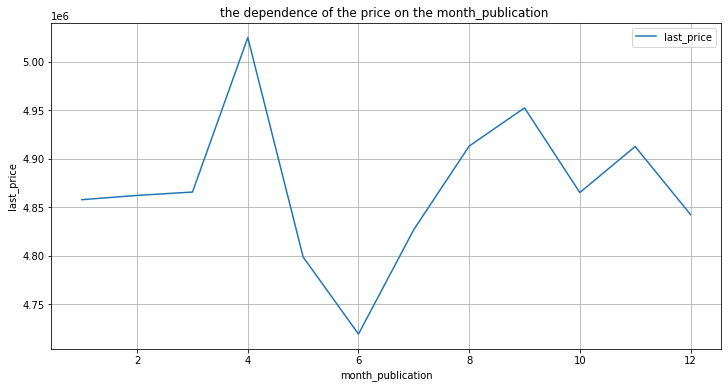

0.0012261961289641832

In [78]:
df.pivot_table(index='month_publication', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('month_publication') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the month_publication ')
plt.show()
df['last_price'].corr(df['month_publication'])

Средняя цена квартиры варьируется в зависимостии от месяца. Пик достигает в апреле месяце, это можно связать с общей активностью  населения весной. Спад летом можно отнести к сезону отпусков. Далее мы видим постепенный рост. В сентябре значение достигает своего второго пика и начинает падение, что бы октябре опять немного подняться в цене. Ближе к новому году цена падает. Как правило к зиме рынок недвижимости начинает замедляться.

Значение корреляции -0.0012 близко к нулю, что указывает на практически полное отсутствие линейной зависимости между месяцем публикации и ценой. Это означает, что изменение месяца публикации объявлений практически не влияет на цену квартиры.
На графике видно, что средние цены могут несколько изменяться в зависимости от месяца. Например, наблюдается пик в определенный месяц и падение в другой. Тем не менее, эти колебания не представляют собой ясного линейного тренда.
Пик в определенном месяце (например, в апреле) и последующее падение могут быть связаны с сезонными колебаниями, экономическими факторами или другими причинами, не связанными напрямую с временем публикации.

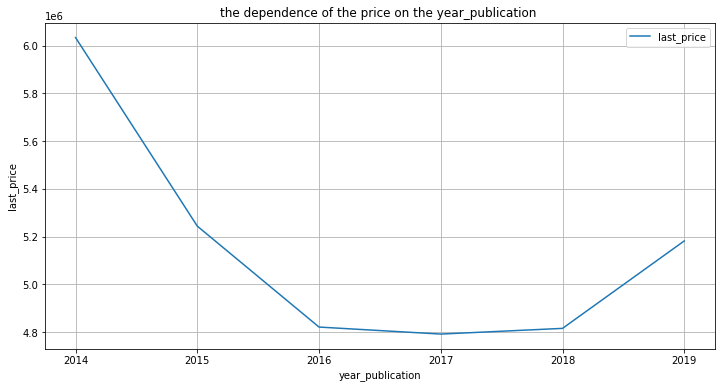

0.004141723562833286

In [79]:
df.pivot_table(index='year_publication', values='last_price') \
    .plot(grid=True, figsize=(12, 6))
plt.xlabel('year_publication') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the year_publication ')
plt.show()
df['last_price'].corr(df['year_publication'])

Средняя цена квартир значительно варьировалась в зависимости от года публикации объявления, что отражает экономические изменения и их влияние на рынок недвижимости. Высокие цены в 2014 году и их последующее снижение в 2015-2016 годах соответствуют экономическому кризису, а рост цен в последние годы может указывать на восстановление рынка.

Значение корреляции 0.004 указывает на то, что год публикации объявлений не оказывает значительного влияния на цену недвижимости в представленных данных. Хотя график показывает определенные тренды изменения цен с течением времени, они не имеют четкой линейной зависимости, и влияние других факторов может быть гораздо значительнее.

In [80]:
top_10 = df.pivot_table(index='locality_name', values='price_one_square', aggfunc=['count', 'mean'])
top_10.columns = ['count', 'mean']
pd.set_option('display.float_format', '{:.2f}'.format)
top_10 = top_10.sort_values(by='count', ascending=False).head(10)
top_10

,count,mean
locality_name,,
санкт-петербург,13247,106616.24
мурино,561,86145.74
кудрово,433,95681.26
шушары,428,78498.83
всеволожск,380,67003.64
колпино,328,75340.29
пушкин,322,100525.58
парголово,313,90811.24
гатчина,300,68858.16


Данные представляют собой средние цены недвижимости в различных населенных пунктах, а также количество предложений в каждом из них.

Санкт-Петербург имеет наибольшее количество предложений (13247) и самую высокую среднюю цену недвижимости, составляющую 106616.24 руб. Это может быть связано с высокой популярностью и значимостью города как крупного культурного и экономического центра.

Всеволожск, Колпино, Гатчина и Выборг имеют более низкие средние цены на недвижимость, с минимальной ценой в Выборге (58035.09 руб.).

Остальные населенные пункты имеют более высокую среднюю цену за квадратный метр, что, вероятно, связано с их более близким расположением к Санкт-Петербургу и более развитой инфраструктурой.

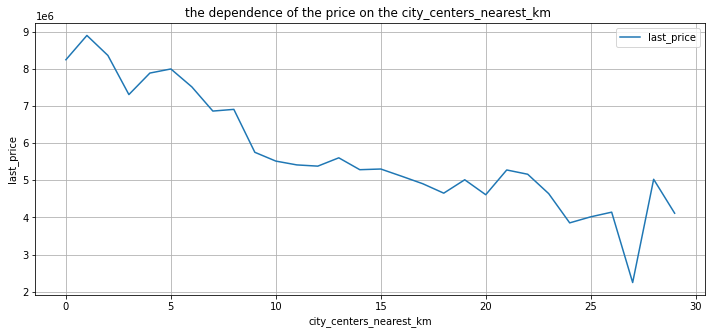

In [81]:
df.query('locality_name =="санкт-петербург"') \
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
    .plot(grid=True, figsize=(12, 5))
plt.xlabel('city_centers_nearest_km') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the city_centers_nearest_km ')
plt.show()

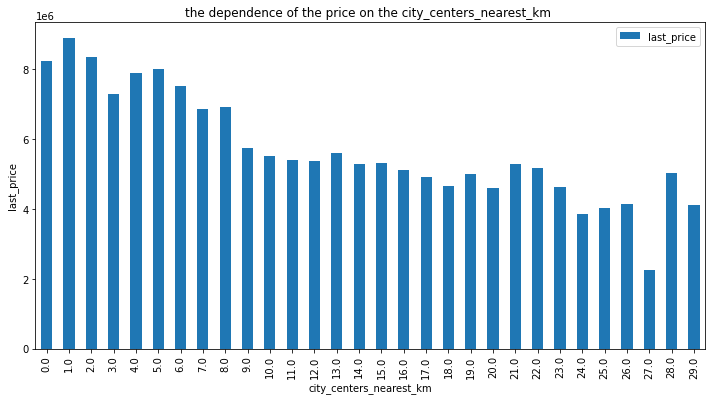

In [82]:
df.query('locality_name =="санкт-петербург"') \
   .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
   .plot(kind='bar', figsize=(12,6))
plt.xlabel('city_centers_nearest_km') 
plt.ylabel('last_price')  
plt.title('the dependence of the price on the city_centers_nearest_km ')
plt.show()

In [83]:
df.query('locality_name =="санкт-петербург"') \
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean') \
    .round().astype(int)

,last_price
city_centers_nearest_km,
0.00,8241429
1.00,8894708
2.00,8356785
3.00,7304831
4.00,7883184
5.00,7993423
6.00,7510973
7.00,6861142
8.00,6906988


Близость к центру города является важным фактором, определяющим стоимость квартир. Наиболее высокие цены наблюдаются в непосредственной близости от центра, после чего стоимость постепенно снижается по мере удаления от него. В пределах 10-20 км от центра снижение становится менее заметным, а на расстояниях свыше 20 км влияние расстояния на цену еще более ослабевает.

### Напишите общий вывод

Проведенная работа

Изучение данных: 

Открытие файла с данными, изучение его структуры, анализ первых строк данных, использование метода info(), и построение гистограмм для визуализации распределения значений.

Обработка пропусков: Обнаружение и заполнение пропущенных значений.

Типизация данных: Установка корректных типов данных для каждого столбца.

Обработка данных: Устранение дубликатов в названиях населённых пунктов, обработка редких и выбивающихся значений, добавление новых параметров, таких как цена за квадратный метр, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города.

Анализ параметров: Исследование и описание различных параметров, таких как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа и другие.

Изучение скорости продаж: Построение гистограммы распределения количества дней экспозиции, расчет средних и медианных значений, определение диапазона для быстрых и долгих продаж.

Анализ факторов, влияющих на цену: Определение ключевых факторов, влияющих на полную стоимость объекта, и построение соответствующих графиков.

Общий вывод:

Анализ предоставленных данных позволяет выделить несколько ключевых факторов, влияющих на цену объектов недвижимости:

Расположение относительно центра города:
Одним из самых значимых факторов является близость к центру города. Чем ближе объект к центру, тем выше его стоимость. Это связано с развитой инфраструктурой, доступом к общественному транспорту и высокой престижностью центральных районов.

Площадь объекта:
Общая площадь квартиры, включая жилую площадь и площадь кухни, прямо пропорционально влияет на цену. Большие по площади квартиры оцениваются выше, что логично, учитывая большее количество квадратных метров.

Количество комнат:
Количество комнат в квартире также значительно влияет на её цену. С увеличением числа комнат цена объекта растет, что отражает увеличивающуюся площадь и потенциальную комфортность проживания.

Месяц и день публикации:
Цены на объекты могут варьироваться в зависимости от месяца и дня публикации объявлений. В определенные месяцы, такие как весенние, цены могут быть выше, что связано с сезонным повышением спроса. Аналогично, на начало недели наблюдается более высокая активность и, возможно, более высокие цены.

Населенный пункт:
Помимо расположения относительно центра Санкт-Петербурга, цены также варьируются в зависимости от конкретного населенного пункта. Например, Санкт-Петербург и Пушкин имеют более высокие средние цены за квадратный метр по сравнению с такими районами, как Всеволожск или Выборг.

Для точной оценки стоимости недвижимости и принятия обоснованных решений на рынке, необходимо учитывать комбинацию этих факторов. Особое внимание следует уделять расположению объекта, его площади и количеству комнат, а также сезонным колебаниям цен. 